In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income-classification/income_evaluation.csv


In [2]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/258.3 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Assuming df is your original DataFrame
import pandas as pd

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    fn = []
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
fn

df_copy_2 = pd.read_csv(fn[0])

# df_copy_2 = df.copy()

# Define the mapping for the workclass column
workclass_mapping = {
    ' Private': 'Private',
    ' Self-emp-not-inc': 'Private',
    ' Self-emp-inc': 'Private',
    ' Without-pay': 'Private',
    ' Federal-gov': 'Gov',
    ' Local-gov': 'Gov',
    ' State-gov': 'Gov',
    ' ?' : ' Never-worked'
}

# Define the mapping for the education column
education_mapping = {
    ' Bachelors': 'Graduate',
    ' Some-college': 'Not Graduate',
    ' 11th grade': 'Not Graduate',
    ' HS-grad': 'Not Graduate',
    ' Prof-school': 'Graduate',
    ' Assoc-acdm': 'Graduate',
    ' Assoc-voc': 'Graduate',
    ' 9th grade': 'Not Graduate',
    ' 7th-8th grade': 'Not Graduate',
    ' 12th grade': 'Not Graduate',
    ' Masters': 'Graduate',
    ' 1st-4th grade': 'Not Graduate',
    ' 10th grade': 'Not Graduate',
    ' Doctorate': 'Graduate',
    ' 5th-6th grade': 'Not Graduate',
    ' Preschool': 'Not Graduate',
    ' 11th': 'Not Graduate',
    ' 9th': 'Not Graduate',
    ' 7th-8th': 'Not Graduate',
       ' 5th-6th': 'Not Graduate',
     ' 10th': 'Not Graduate',
    ' 1st-4th': 'Not Graduate',
    ' 12th': 'Not Graduate',
}

marital_status_mapping = {
    ' Married-civ-spouse': 'Married',
    ' Married-AF-spouse': 'Married',
    ' Married-spouse-absent': 'Married',
    ' Divorced': 'Not Married',
    ' Never-married': 'Not Married',
    ' Separated': 'Not Married',
    ' Widowed': 'Not Married'
}

# Define the mapping for the occupation column
occupation_mapping = {
    ' Tech-support': 'White Collar',
    ' Craft-repair': 'Blue Collar',
    ' Other-service': 'Pink Collar',
    ' Sales': 'White Collar',
    ' Exec-managerial': 'White Collar',
    ' Prof-specialty': 'White Collar',
    ' Handlers-cleaners': 'Blue Collar',
    ' Machine-op-inspct': 'Blue Collar',
    ' Adm-clerical': 'White Collar',
    ' Farming-fishing': 'Blue Collar',
    ' Transport-moving': 'Blue Collar',
    ' Priv-house-serv': 'Pink Collar',
    ' Protective-serv': 'Blue Collar',
    ' Armed-Forces': 'Blue Collar',
    ' ?' : 'Blue Collar'
}


# Define the mapping for the relationship column
relationship_mapping = {
    ' Wife': 'Married',
    ' Own-child': 'Unmarried',
    ' Husband': 'Married',
    ' Not-in-family': 'Unmarried',
    ' Other-relative': 'Unmarried',
    ' Unmarried': 'Unmarried'
}


# Define the mapping for the race column
race_mapping = {
    ' White': 'White',
    ' Asian-Pac-Islander': 'Not White',
    ' Amer-Indian-Eskimo': 'Not White',
    ' Other': 'Not White',
    ' Black': 'Not White'
}

# Define the mapping for the native-country column
native_country_mapping = {
    ' United-States': 'First World',
    ' Cambodia': 'Third World',
    ' England': 'First World',
    ' Puerto-Rico': 'Third World',
    ' Canada': 'First World',
    ' Germany': 'First World',
    ' Outlying-US(Guam-USVI-etc)': 'First World',
    ' India': 'Third World',
    ' Japan': 'First World',
    ' Greece': 'First World',
    ' South': 'Third World',
    ' China': 'Second World',
    ' Cuba': 'Second World',
    ' Iran': 'Third World',
    ' Honduras': 'Third World',
    ' Philippines': 'Third World',
    ' Italy': 'First World',
    ' Poland': 'Second World',
    ' Jamaica': 'Third World',
    ' Vietnam': 'Second World',
    ' Mexico': 'Third World',
    ' Portugal': 'First World',
    ' Ireland': 'First World',
    ' France': 'First World',
    ' Dominican-Republic': 'Third World',
    ' Laos': 'Third World',
    ' Ecuador': 'Third World',
    ' Taiwan': 'First World',
    ' Haiti': 'Third World',
    ' Columbia': 'Third World',
    ' Hungary': 'Second World',
    ' Guatemala': 'Third World',
    ' Nicaragua': 'Third World',
    ' Scotland': 'First World',
    ' Thailand': 'Third World',
    ' Yugoslavia': 'Second World',
    ' El-Salvador': 'Third World',
    ' Trinadad&Tobago': 'Third World',
    ' Peru': 'Third World',
    ' Hong': 'First World',
    ' Holand-Netherlands': 'First World',
    " ?": 'Third World'
}

# Apply the mapping to the native-country column
df_copy_2[' native-country'] = df_copy_2[' native-country'].map(native_country_mapping).fillna(df_copy_2[' native-country'])

# Apply the mapping to the race column
df_copy_2[' race'] = df_copy_2[' race'].map(race_mapping).fillna(df_copy_2[' race'])



# Apply the mapping to the relationship column
df_copy_2[' relationship'] = df_copy_2[' relationship'].map(relationship_mapping).fillna(df_copy_2[' relationship'])

# Apply the mapping to the occupation column
df_copy_2[' occupation'] = df_copy_2[' occupation'].map(occupation_mapping).fillna(df_copy_2[' occupation'])

# Apply the mapping to the education column
df_copy_2[' education'] = df_copy_2[' education'].map(education_mapping).fillna(df_copy_2[' education'])

# Apply the mapping to the workclass column
df_copy_2[' workclass'] = df_copy_2[' workclass'].map(workclass_mapping).fillna(df_copy_2[' workclass'])

df_copy_2[' marital-status'] = df_copy_2[' marital-status'].map(marital_status_mapping).fillna(df_copy_2[' marital-status'])

df_copy_2[' native-country'].unique()

df_copy_2.columns = df_copy_2.columns.str.strip()
df_copy_2

df_copy_2['income'] = df_copy_2['income'].map({' >50K': 1, ' <=50K': 0})
df_copy_2['relationship'] = df_copy_2['relationship'].map({'Married': 1, 'Unmarried': 0})
df_copy_2['marital-status'] = df_copy_2['marital-status'].map({'Married': 1, 'Not Married': 0})
df_copy_2['education'] = df_copy_2['education'].map({'Graduate': 1, 'Not Graduate': 0})
df_copy_2['race'] = df_copy_2['race'].map({'White': 1, 'Not White': 0})
df_copy_2['native-country'] = df_copy_2['native-country'].map({'First World':2,
                            'Second World': 1, 
                            'Third World': 0})
df_copy_2['occupation'] = df_copy_2['occupation'].map({'White Collar':2,
                            'Blue Collar': 1, 
                            'Pink Collar': 0})
df_copy_2['workclass'] = df_copy_2['workclass'].map({'Private':2,
                            'Gov': 1, 
                            ' Never-worked': 0})
df_copy_2['sex'] = df_copy_2['sex'].map({' Male': 1, ' Female': 0})




import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


# Separate the 'income' column
income = df_copy_2['income']
df_copy_2 = df_copy_2.drop(columns=['income'])

# Apply StandardScaler to the rest of the DataFrame
scaler = StandardScaler()
df_copy_2 = pd.DataFrame(scaler.fit_transform(df_copy_2), 
                         columns=df_copy_2.columns)

# Add the 'income' column back
df_copy_2['income'] = income
df_copy_2

df_copy_2 = df_copy_2.drop('relationship', axis=1)
df_copy_2


# Assuming df_copy_2 is your DataFrame and 'income' is the target column
X = df_copy_2.drop('income', axis=1)
y = df_copy_2['income']


print("Original class distribution:\n", y.value_counts())

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X,
                                              y)

print("Resampled class distribution:\n", y.value_counts())
# print("Resampled class distribution:\n", y_train_res.value_counts())



# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=42)

from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: 50% of temp (15% of original data) for validation and 50% for test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_temp = None
y_temp = None

# Verifying the sizes
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")


/kaggle/input/income-classification/income_evaluation.csv


Original class distribution:
 income
0    24720
1     7841
Name: count, dtype: int64


Resampled class distribution:
 income
0    24720
1    24720
Name: count, dtype: int64
Training set: 34608 samples
Validation set: 7416 samples
Test set: 7416 samples


In [4]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39302,-0.852407,0.451318,1.417249,1.447871,1.320270,-0.948296,0.888477,0.413020,-1.422331,-0.14592,-0.216660,-0.035429,0.295335
42257,-0.028214,0.451318,-1.012888,1.447871,1.185736,1.054523,0.888477,0.413020,-1.422331,-0.14592,-0.216660,-0.035429,0.295335
46331,0.414399,0.451318,-0.607855,1.447871,1.134739,1.054523,0.888477,0.413020,0.703071,-0.14592,-0.216660,-0.035429,0.295335
44622,0.271601,0.451318,-0.290959,-0.690669,-0.031360,1.054523,-0.598834,0.413020,0.703071,-0.14592,-0.216660,1.306789,0.295335
30387,-0.409205,0.451318,-1.039527,-0.690669,-0.420060,-0.948296,-0.598834,0.413020,0.703071,-0.14592,-0.216660,-0.035429,0.295335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.262580,0.451318,0.097952,1.447871,1.134739,1.054523,0.888477,-2.421192,0.703071,-0.14592,4.466257,0.774468,-3.508621
44732,-0.055363,0.451318,0.436814,-0.690669,-0.420060,1.054523,-0.598834,0.413020,-1.422331,-0.14592,-0.216660,-0.035429,0.295335
38158,-0.702455,0.451318,-1.187819,1.447871,1.134739,1.054523,0.888477,0.413020,0.703071,-0.14592,-0.216660,-0.035429,0.295335
860,-1.508894,0.451318,0.251123,-0.690669,-1.197459,-0.948296,0.888477,0.413020,-1.422331,-0.14592,-0.216660,-1.655225,0.295335


In [5]:
# Assuming df is your original DataFrame
import pandas as pd

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    fn = []
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
fn

df_copy_2 = pd.read_csv(fn[0])

# df_copy_2 = df.copy()

# Define the mapping for the workclass column
workclass_mapping = {
    ' Private': 'Private',
    ' Self-emp-not-inc': 'Private',
    ' Self-emp-inc': 'Private',
    ' Without-pay': 'Private',
    ' Federal-gov': 'Gov',
    ' Local-gov': 'Gov',
    ' State-gov': 'Gov',
    ' ?' : ' Never-worked'
}

# Define the mapping for the education column
education_mapping = {
    ' Bachelors': 'Graduate',
    ' Some-college': 'Not Graduate',
    ' 11th grade': 'Not Graduate',
    ' HS-grad': 'Not Graduate',
    ' Prof-school': 'Graduate',
    ' Assoc-acdm': 'Graduate',
    ' Assoc-voc': 'Graduate',
    ' 9th grade': 'Not Graduate',
    ' 7th-8th grade': 'Not Graduate',
    ' 12th grade': 'Not Graduate',
    ' Masters': 'Graduate',
    ' 1st-4th grade': 'Not Graduate',
    ' 10th grade': 'Not Graduate',
    ' Doctorate': 'Graduate',
    ' 5th-6th grade': 'Not Graduate',
    ' Preschool': 'Not Graduate',
    ' 11th': 'Not Graduate',
    ' 9th': 'Not Graduate',
    ' 7th-8th': 'Not Graduate',
       ' 5th-6th': 'Not Graduate',
     ' 10th': 'Not Graduate',
    ' 1st-4th': 'Not Graduate',
    ' 12th': 'Not Graduate',
}

marital_status_mapping = {
    ' Married-civ-spouse': 'Married',
    ' Married-AF-spouse': 'Married',
    ' Married-spouse-absent': 'Married',
    ' Divorced': 'Not Married',
    ' Never-married': 'Not Married',
    ' Separated': 'Not Married',
    ' Widowed': 'Not Married'
}

# Define the mapping for the occupation column
occupation_mapping = {
    ' Tech-support': 'White Collar',
    ' Craft-repair': 'Blue Collar',
    ' Other-service': 'Pink Collar',
    ' Sales': 'White Collar',
    ' Exec-managerial': 'White Collar',
    ' Prof-specialty': 'White Collar',
    ' Handlers-cleaners': 'Blue Collar',
    ' Machine-op-inspct': 'Blue Collar',
    ' Adm-clerical': 'White Collar',
    ' Farming-fishing': 'Blue Collar',
    ' Transport-moving': 'Blue Collar',
    ' Priv-house-serv': 'Pink Collar',
    ' Protective-serv': 'Blue Collar',
    ' Armed-Forces': 'Blue Collar',
    ' ?' : 'Blue Collar'
}


# Define the mapping for the relationship column
relationship_mapping = {
    ' Wife': 'Married',
    ' Own-child': 'Unmarried',
    ' Husband': 'Married',
    ' Not-in-family': 'Unmarried',
    ' Other-relative': 'Unmarried',
    ' Unmarried': 'Unmarried'
}


# Define the mapping for the race column
race_mapping = {
    ' White': 'White',
    ' Asian-Pac-Islander': 'Not White',
    ' Amer-Indian-Eskimo': 'Not White',
    ' Other': 'Not White',
    ' Black': 'Not White'
}

# Define the mapping for the native-country column
native_country_mapping = {
    ' United-States': 'First World',
    ' Cambodia': 'Third World',
    ' England': 'First World',
    ' Puerto-Rico': 'Third World',
    ' Canada': 'First World',
    ' Germany': 'First World',
    ' Outlying-US(Guam-USVI-etc)': 'First World',
    ' India': 'Third World',
    ' Japan': 'First World',
    ' Greece': 'First World',
    ' South': 'Third World',
    ' China': 'Second World',
    ' Cuba': 'Second World',
    ' Iran': 'Third World',
    ' Honduras': 'Third World',
    ' Philippines': 'Third World',
    ' Italy': 'First World',
    ' Poland': 'Second World',
    ' Jamaica': 'Third World',
    ' Vietnam': 'Second World',
    ' Mexico': 'Third World',
    ' Portugal': 'First World',
    ' Ireland': 'First World',
    ' France': 'First World',
    ' Dominican-Republic': 'Third World',
    ' Laos': 'Third World',
    ' Ecuador': 'Third World',
    ' Taiwan': 'First World',
    ' Haiti': 'Third World',
    ' Columbia': 'Third World',
    ' Hungary': 'Second World',
    ' Guatemala': 'Third World',
    ' Nicaragua': 'Third World',
    ' Scotland': 'First World',
    ' Thailand': 'Third World',
    ' Yugoslavia': 'Second World',
    ' El-Salvador': 'Third World',
    ' Trinadad&Tobago': 'Third World',
    ' Peru': 'Third World',
    ' Hong': 'First World',
    ' Holand-Netherlands': 'First World',
    " ?": 'Third World'
}

# Apply the mapping to the native-country column
df_copy_2[' native-country'] = df_copy_2[' native-country'].map(native_country_mapping).fillna(df_copy_2[' native-country'])

# Apply the mapping to the race column
df_copy_2[' race'] = df_copy_2[' race'].map(race_mapping).fillna(df_copy_2[' race'])



# Apply the mapping to the relationship column
df_copy_2[' relationship'] = df_copy_2[' relationship'].map(relationship_mapping).fillna(df_copy_2[' relationship'])

# Apply the mapping to the occupation column
df_copy_2[' occupation'] = df_copy_2[' occupation'].map(occupation_mapping).fillna(df_copy_2[' occupation'])

# Apply the mapping to the education column
df_copy_2[' education'] = df_copy_2[' education'].map(education_mapping).fillna(df_copy_2[' education'])

# Apply the mapping to the workclass column
df_copy_2[' workclass'] = df_copy_2[' workclass'].map(workclass_mapping).fillna(df_copy_2[' workclass'])

df_copy_2[' marital-status'] = df_copy_2[' marital-status'].map(marital_status_mapping).fillna(df_copy_2[' marital-status'])

df_copy_2[' native-country'].unique()

df_copy_2.columns = df_copy_2.columns.str.strip()
df_copy_2

df_copy_2['income'] = df_copy_2['income'].map({' >50K': 1, ' <=50K': 0})
df_copy_2['relationship'] = df_copy_2['relationship'].map({'Married': 1, 'Unmarried': 0})
df_copy_2['marital-status'] = df_copy_2['marital-status'].map({'Married': 1, 'Not Married': 0})
df_copy_2['education'] = df_copy_2['education'].map({'Graduate': 1, 'Not Graduate': 0})
df_copy_2['race'] = df_copy_2['race'].map({'White': 1, 'Not White': 0})
df_copy_2['native-country'] = df_copy_2['native-country'].map({'First World':2,
                            'Second World': 1, 
                            'Third World': 0})
df_copy_2['occupation'] = df_copy_2['occupation'].map({'White Collar':2,
                            'Blue Collar': 1, 
                            'Pink Collar': 0})
df_copy_2['workclass'] = df_copy_2['workclass'].map({'Private':2,
                            'Gov': 1, 
                            ' Never-worked': 0})
df_copy_2['sex'] = df_copy_2['sex'].map({' Male': 1, ' Female': 0})




import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


# Separate the 'income' column
income = df_copy_2['income']
df_copy_2 = df_copy_2.drop(columns=['income'])

df_copy_2['net-capital'] = df_copy_2['capital-gain'] - df_copy_2['capital-loss']

# Drop the old columns 'capital-gain' and 'capital-loss'
df_copy_2.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)


df_copy_2


/kaggle/input/income-classification/income_evaluation.csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,net-capital
0,39,1,77516,1,13,0,2,0,1,1,40,2,2174
1,50,2,83311,1,13,1,2,1,1,1,13,2,0
2,38,2,215646,0,9,0,1,0,1,1,40,2,0
3,53,2,234721,0,7,1,1,1,0,1,40,2,0
4,28,2,338409,1,13,1,2,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,1,12,1,2,1,1,0,38,2,0
32557,40,2,154374,0,9,1,1,1,1,1,40,2,0
32558,58,2,151910,0,9,0,2,0,1,0,40,2,0
32559,22,2,201490,0,9,0,2,0,1,1,20,2,0


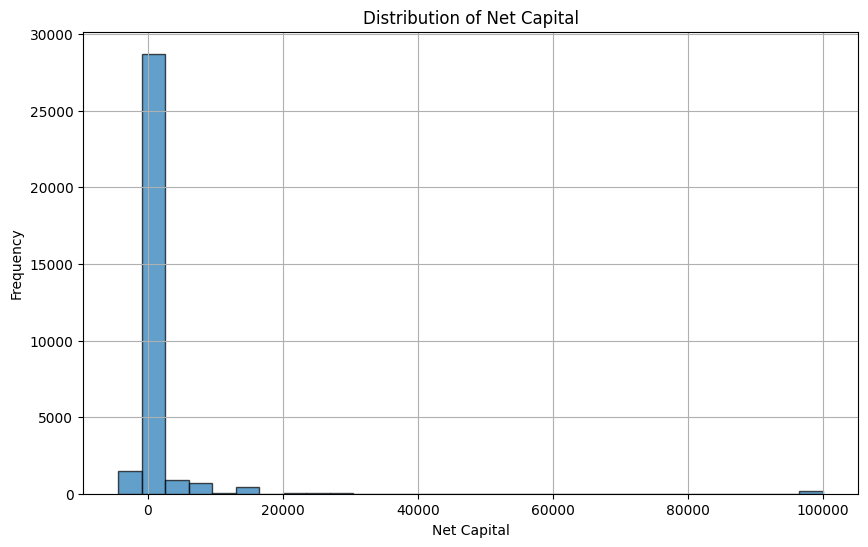

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_copy_2 is your DataFrame
# Plotting the distribution of the 'net-capital' column
plt.figure(figsize=(10, 6))
plt.hist(df_copy_2['net-capital'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Net Capital')
plt.xlabel('Net Capital')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [7]:
# Final Results:
# Best Test Accuracy: 0.8419 (Model: HistGradientBoostingClassifier)
# Training Accuracy of the Best Test Model: 0.8875

In [8]:
# GaussianProcessClassifier

In [9]:
# # Separate the 'income' column
# income = df_copy_2['income']
# df_copy_2 = df_copy_2.drop(columns=['income'])

# Apply StandardScaler to the rest of the DataFrame
scaler = StandardScaler()
df_copy_2 = pd.DataFrame(scaler.fit_transform(df_copy_2), 
                         columns=df_copy_2.columns)

# Add the 'income' column back
df_copy_2['income'] = income
df_copy_2

df_copy_2 = df_copy_2.drop('relationship', axis=1)
df_copy_2


# Assuming df_copy_2 is your DataFrame and 'income' is the target column
X = df_copy_2.drop('income', axis=1)
y = df_copy_2['income']
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,net-capital
0,0.030671,-1.377146,-1.063611,1.447871,1.134739,-0.948296,0.888477,0.413020,0.703071,-0.035429,0.295335,0.159762
1,0.837109,0.451318,-1.008707,1.447871,1.134739,1.054523,0.888477,0.413020,0.703071,-2.222153,0.295335,-0.133670
2,-0.042642,0.451318,0.245079,-0.690669,-0.420060,-0.948296,-0.598834,0.413020,0.703071,-0.035429,0.295335,-0.133670
3,1.057047,0.451318,0.425801,-0.690669,-1.197459,1.054523,-0.598834,-2.421192,0.703071,-0.035429,0.295335,-0.133670
4,-0.775768,0.451318,1.408176,1.447871,1.134739,1.054523,0.888477,-2.421192,-1.422331,-0.035429,-1.606643,-0.133670
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.451318,0.639741,1.447871,0.746039,1.054523,0.888477,0.413020,-1.422331,-0.197409,0.295335,-0.133670
32557,0.103983,0.451318,-0.335433,-0.690669,-0.420060,1.054523,-0.598834,0.413020,0.703071,-0.035429,0.295335,-0.133670
32558,1.423610,0.451318,-0.358777,-0.690669,-0.420060,-0.948296,0.888477,0.413020,-1.422331,-0.035429,0.295335,-0.133670
32559,-1.215643,0.451318,0.110960,-0.690669,-0.420060,-0.948296,0.888477,0.413020,0.703071,-1.655225,0.295335,-0.133670


In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# Step 1: Copy the DataFrame
# df_copy = df.copy()

# # Step 2: Ordinally encode non-numeric columns
# ordinal_encoder = OrdinalEncoder()
# non_numeric_cols = df_copy.select_dtypes(include=['object']).columns
# df_copy[non_numeric_cols] = ordinal_encoder.fit_transform(df_copy[non_numeric_cols])

# # Step 3: Normalize all columns
# scaler = MinMaxScaler()
# df_copy[df_copy.columns] = scaler.fit_transform(df_copy)


# df_copy


# x = df_copy.drop(' income', axis=1)
# y = df_copy[' income']



# columns_to_keep = [' relationship', ' education-num',
#                    ]

# # # Select only the specified columns
# x = x[columns_to_keep]
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import os

# Assuming X_train, y_train, X_test, y_test are already defined
# If not, you can split your data like this:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200],
    'max_leaf_nodes': [31, 63],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [20, 50],
    'l2_regularization': [0.0, 1.0]
}

# Initialize the classifier
clf = HistGradientBoostingClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best parameters and accuracies
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Accuracy: {train_accuracy:.4f}")
print(f"Best Test Accuracy: {test_accuracy:.4f}")

# Store the best model in a variable
best_model = grid_search.best_estimator_

# Function to clear the console
def clear_console():
    os.system('cls' if os.name == 'nt' else 'clear')

# Perform k-fold cross-validation and print the results
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
clear_console()
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


Best Parameters: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 31, 'min_samples_leaf': 20}
Best Training Accuracy: 0.8799
Best Test Accuracy: 0.8697


Cross-Validation Scores: [0.86400526 0.86970827 0.87428697 0.86287846 0.86682756]
Mean CV Accuracy: 0.8675
Standard Deviation of CV Accuracy: 0.0041
